# <font color="maroon"> Prediction of Car price using Multiple Linear Regression </font>

# Step 1 : Importing and understanding the structure of the data

In [507]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [508]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
car_price_data=pd.read_csv('CarPrice_Assignment.csv')
car_price_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [509]:
shape=car_price_data.shape
print(color.BOLD + "There are " +str(shape[0])+ " rows  and "+str(shape[1])+" columns")

There are 205 rows  and 26 columns


In [510]:
info=car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Step 2: Pre-processing the data


   #### a. Handling the missing values,Dropping the unnecessary columns
   #### b. Handling the outliers
   #### c. Transforming the skewed variables
   #### d. Dummy coding the categorical variables
   #### e. Splitting the data
   #### e. Scaling the numerical variables in the training dataset as the range impact linear regression results

### <font color="maroon"> a. Handling the missing values and feature variables creation

In [511]:
car_price_data['Company']=car_price_data.CarName.str.split(' ').str[0]
car_price_data.Company.unique()
car_price_data.drop(columns=['CarName'],inplace=True)


#There are some misspelt words in the data set
car_price_data.Company.replace('maxda','mazda',inplace=True)
car_price_data.Company.replace('Nissan','nissan',inplace=True)
car_price_data.Company.replace('porcshce','porsche',inplace=True)
car_price_data.Company.replace('toyouta','toyota',inplace=True)
car_price_data.Company.replace('vokswagen','volkswagen',inplace=True)
car_price_data.Company.replace('vw','volkswagen',inplace=True)

#Looking if there ae no duplicates in the columns
car_price_data.loc[car_price_data.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company


In [512]:
#No columns with missing values
car_price_data.columns[car_price_data.isna().sum()!=0]

Index([], dtype='object')

### <font color="maroon"> b. Handling the outliers
An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error

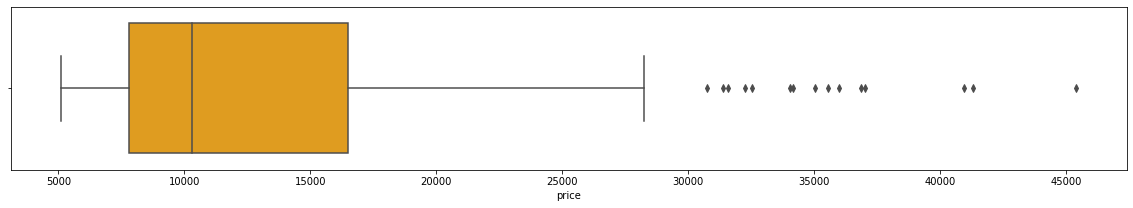

Looking at the prices above 25000. From looking at the data, we can say that these are the premium cars like bmw,jaguar


0        bmw
1     jaguar
2      buick
3    porsche
dtype: object

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

#Looking at the boxplot of the target variable
plt.figure(figsize = (20,3))
sns.boxplot(x = 'price', data = car_price_data,color="orange")
plt.show()

print(color.BOLD+'Looking at the prices above 25000. From looking at the data, we can say that these are the premium cars like bmw,jaguar')
pd.Series(car_price_data[car_price_data['price']>25000]['Company'].str.split(' ').str[0].unique())

# <font color="maroon"> Exploratory Data Analysis 

In [515]:
car_price_data.drop(columns=['car_ID'],inplace=True)

In [516]:
#Converting the column Symboling to categorical
car_price_data['symboling']=car_price_data['symboling'].astype('object')

#splitting the columns into numerical and categorical columns
numeric_cols_data=car_price_data.select_dtypes(include=['int64','float64'])

## <font color="green" >a. Visualizing numeric variables 

In [520]:
numeric_cols_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [521]:
print(color.BOLD + 'The skewness of the variables are ')
numeric_cols_data.skew(axis = 0, skipna = True,numeric_only=True) 

The skewness of the variables are 


wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Most of the variables look like normally distributed. The variables are not skewed

### Correlation Analysis

#### Creating a correlation matrix to look at the issue of multi-collinearity ( correlation among the predictors). Correlation analysis is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable. In other words, it’s a commonly-used method for feature selection in machine learning


(14.5, -0.5)

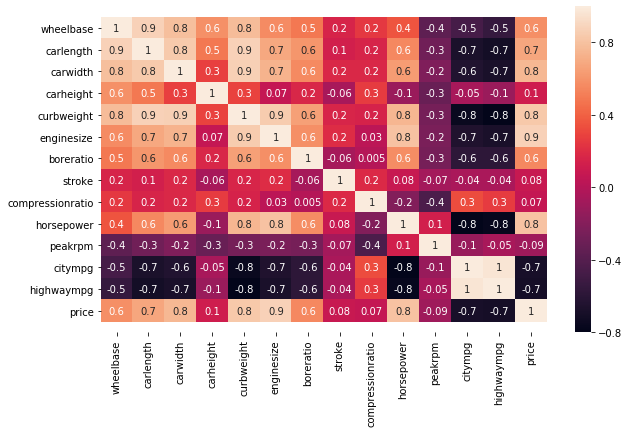

In [522]:
plt.figure(figsize = (10,6))
ax=sns.heatmap(numeric_cols_data.corr(), annot=True,fmt='.1g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

#### Insights from the correlation analysis
    1. Target (Price of the car) is highly correlated with enginesize,carwidth,horsepower,mileage of the car.Price is negatively correlated with the mileage and positively correlated with engine size,car width, car length
    2. Predictors share lots of variance among themselves (Multi-collinearity)
       For example, wheelbase is highly correlated with car length and car width. Horse power is     
                    highly correlated with the mileage 
       Therefore variable selection methods/ Principal component analysis have to be performed to handle this problem

### 1st Method: 
### Finding principal component for the numeric variables

In [523]:
x=numeric_cols_data.loc[:,numeric_cols_data.columns !='price']
y=numeric_cols_data.loc[:,numeric_cols_data.columns =='price']

 we can choose 4 principal components that explains about 90% of the variance


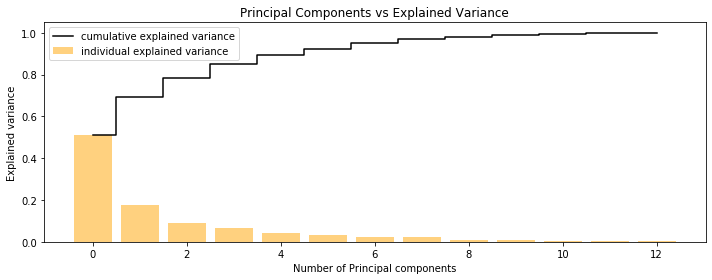

In [530]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_standard = StandardScaler().fit_transform(x)
pca=PCA()
pca.fit_transform(x_standard)

# Plotting and choosing number of PCs based on the explained variance
plt.figure(figsize=(10,4))

#Barchart showing pc's vs explained variance
plt.bar(range(pca.components_.shape[1]), pca.explained_variance_ratio_, alpha=0.5,align='center',
            label='individual explained variance',color="orange")

#Step chart showing pc's vs cumulative explained variance
plt.step(range(pca.components_.shape[1]), np.cumsum(pca.explained_variance_ratio_), where='mid',
             label='cumulative explained variance',color="black")
plt.ylabel('Explained variance')
plt.xlabel('Number of Principal components')
plt.title('Principal Components vs Explained Variance')
plt.legend(loc='best')
plt.tight_layout()

print( color.BOLD+ " we can choose 4 principal components that explains about 90% of the variance")

### 2nd Method :
### Find the important numeric predictors using the Ridge Regression

Ridge Regression shrinks coefficients to a value near 0. It keeps all the predictor variables in the model. It uses L2 regularization

The optimum shrinkage parameter for Ridge Regression value looks like 1


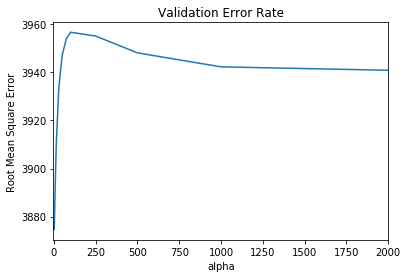

In [534]:
#choosing set of alpha values to try
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100,250,500,1000,2000]

#Caluculation of root mean square error for different sets of alpha.
#This is done to use the effective shrinkage parameter alpha


def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#calculation of mean of the average squared error for each alpha for Ridge Regression
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()  for alpha in alphas]

#indexing the cross validation errors with alpha value
cv_ridge = pd.Series(cv_ridge, index = alphas)

#Plotting error against alpha to choose the best one
cv_ridge.plot(title = "Validation Error Rate")
plt.xlabel("alpha")
plt.xlim(-2,2000)
plt.ylabel("Root Mean Square Error")
print('The optimum shrinkage parameter for Ridge Regression value looks like 1')

In [541]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


model_ridge = RidgeCV(alphas =[2000]).fit(x, y)


print(color.BOLD+'The mean square error on using Ridge Regression is ')
rmse_cv(model_ridge).mean()
print(' \n ')
print(color.BOLD+'The selected variables using Ridge regression are ')
coef = pd.Series(model_ridge.coef_.reshape(13,),index=x.columns)
coef

The mean square error on using Ridge Regression is 
 
 
The selected variables using Ridge regression are 


wheelbase            53.624971
carlength            -9.629953
carwidth             46.491453
carheight            44.507858
curbweight            3.992487
enginesize           98.341228
boreratio            -0.781242
stroke              -23.080786
compressionratio    113.016086
horsepower           38.023735
peakrpm               2.127976
citympg              -3.929352
highwaympg           17.989266
dtype: float64

### 3rd Method :
### Find the important numeric predictors using the Lasso Regression

Lasso Regression shrinks few coefficients to  0. It doesn't keeps all the predictor variables in the model. It uses L1 regularization

The optimum shrinkage parameter for Lasso Regression value looks like a value very close to 0


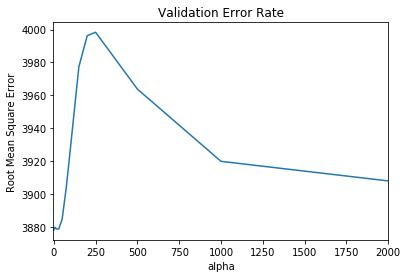

In [542]:
#choosing set of alpha values to try
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100,150,200,250,500,1000,2000]

#Caluculation of root mean square error for different sets of alpha.
#This is done to use the effective shrinkage parameter alpha


def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#calculation of mean of the average squared error for each alpha for Ridge Regression
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean()  for alpha in alphas]

#indexing the cross validation errors with alpha value
cv_lasso = pd.Series(cv_lasso, index = alphas)

#Plotting error against alpha to choose the best one
cv_lasso.plot(title = "Validation Error Rate")
plt.xlabel("alpha")
plt.xlim(-2,2000)
plt.ylabel("Root Mean Square Error")
print(color.BOLD+ 'The optimum shrinkage parameter for Lasso Regression value looks like a value very close to 0')

In [552]:
###Model Lasso regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


model_lasso = LassoCV(alphas =[2000]).fit(x, y)


print(color.BOLD+"The mean square error is "+ str(rmse_cv(model_lasso).mean()))
print(' \n ')

###Model Lasso regression

print(color.BOLD+'The selected variables using LASSO regression are ')
coef = pd.Series(model_lasso.coef_, index = x.columns)
coef[coef !=0 ]

The mean square error is 3907.959848093844
 
 
The selected variables using LASSO regression are 


curbweight           5.211855
enginesize          97.851063
compressionratio    31.504491
horsepower          24.475784
peakrpm              2.016219
dtype: float64

## <font color="orange">b. Visualizing categorical variables 

In [553]:
# #Selecting lasso output variables and all the categorical variables

# Filtered_dataset=car_price_data[['curbweight','enginesize','compressionratio','horsepower','peakrpm','price']]

# #Filtered_dataset=car_price_data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','Company','price']]

In [555]:
categorical_cols=car_price_data.select_dtypes(include=['object']).columns
print(color.BOLD+ 'The categorical variables are')
categorical_cols

The categorical variables are


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company'],
      dtype='object')

#### Inference from the bar graphs
    1.Toyota looks like the mostly sold car
    2.There is more demand for the gas fuelled vehicles than the diesel ones
    3.Understandbly most of the vehicles in the data have engine in the front side
    4.There are more sedans followed by hatchbacks  when comapred to other sections 
    5.There are dominatly more cars with 4 cylinders 

### <font color="brown"> 1. Impact of the fuel type on the price of the car

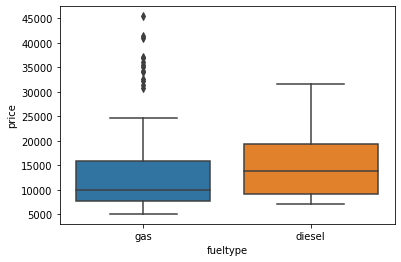

 Cars that use gas have lower mean price when compared to the ones that use diesel.This is very intuituive because generally trucks which use diesel are expensive when compared to the sedans


In [564]:
sns.boxplot(x='fueltype',y='price',data=car_price_data)
plt.show()
print(' Cars that use gas have lower mean price when compared to the ones that use diesel.This is very intuituive because generally trucks which use diesel are expensive when compared to the sedans')

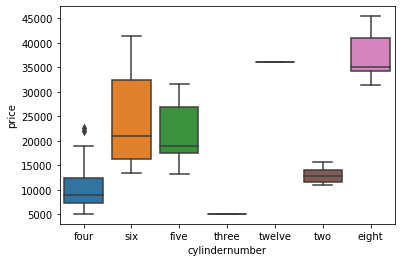

In [568]:
sns.boxplot(x='cylindernumber',y='price',data=car_price_data)
plt.show()

## <font color="maroon"> c. Transforming the skewed variables

Most of the data looks like normal distributed. The variables needn't be transformed

## <font color="maroon"> d. Dummy coding the categorical variables

In [569]:
def dummy_coding(column,df):
    temp = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

In [570]:
# Applying the function to create dummy variables

car_price_data = dummy_coding('symboling',car_price_data)
car_price_data = dummy_coding('fueltype',car_price_data)
car_price_data = dummy_coding('aspiration',car_price_data)
car_price_data = dummy_coding('doornumber',car_price_data)
car_price_data = dummy_coding('carbody',car_price_data)
car_price_data = dummy_coding('drivewheel',car_price_data)
car_price_data = dummy_coding('enginelocation',car_price_data)
car_price_data = dummy_coding('enginetype',car_price_data)
car_price_data = dummy_coding('cylindernumber',car_price_data)
car_price_data = dummy_coding('fuelsystem',car_price_data)
car_price_data = dummy_coding('Company',car_price_data)

## <font color="maroon"> e. Splitting the data into train and test

In [580]:
type(car_price_data)

pandas.core.frame.DataFrame

In [581]:
car_price_data.drop(columns=['wheelbase', 'carlength', 'carwidth', 'carheight','boreratio','stroke','citympg','highwaympg'],inplace=True)

In [582]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_price_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#Defining Target variable for the training data set
Y_train = df_train.pop('price')
X_train = df_train

#Defining Target variable for the training data set
Y_test = df_test.pop('price')
X_test = df_test


#  Step 3: Buidling the model before binning the categorical variables

In [583]:
from sklearn.feature_selection import RFE # Importing recursive feature elimination (stepwise)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

Regression_model = LinearRegression()
Regression_model.fit(X_train,Y_train)

# #Performing recursive feature eliminate to choose top 10 features
# rfe = RFE(Regression_model, 10)
# rfe = rfe.fit(X_train, Y_train)
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [584]:
X = sm.add_constant(X_train) #Adding the constant
lm = sm.OLS(Y_train,X).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     41.68
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           4.70e-45
Time:                        19:47:02   Log-Likelihood:                -1251.6
No. Observations:                 143   AIC:                             2611.
Df Residuals:                      89   BIC:                             2771.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.003e+04   8785.359  